In [12]:
# packages
# import for webscraping
from bs4 import BeautifulSoup
import requests

#import for statsmodels
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.regression.linear_model import OLS

# Samarbeid: Kenneth Benonisen, Tore Birkelund

In [13]:
def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.nav.no/no/nav-og-samfunn/statistikk/sykefravar-statistikk/tabeller/sykepengedager-betalt-av-folketrygden.1-kvartal-2004-2020.i-tusen-dager')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="statTab"><thead><tr><th class="statHead"> </th><th class="statRest">2004</th><th class="statRest">2005</th><th class="statRest">2006</th><th class="statRest">2007</th><th class="statRest">2008</th><th class="statRest">2009</th><th class="statRest">2010</th><th class="statRest">2011</th><th class="statRest">2012</th><th class="statRest">2013</th><th class="statRest">2014</th><th class="statRest">2015</th><th class="statRest">2016</th><th class="statRest">2017</th><th class="statRest">2018</th><th class="statRest">2019</th><th class="statRest">2020</th></tr></thead><tbody><tr><td class="statGroupHead">I Alt</td><td class="statGroupRest">9 194</td><td class="statGroupRest">7 402</td><td class="statGroupRest">8 429</td><td class="statGroupRest">8 316</td><td class="statGroupRest">8 292</td><td class="statGroupRest">8 687</td><td class="statGroupRest">8 886</td><td class="statGroupRest">8 851</td><td class="statGroupRest">8 441</td><td class="statGroupRest">8 393</td><td class

In [14]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], ['I Alt', '9 194', '7 402', '8 429', '8 316', '8 292', '8 687', '8 886', '8 851', '8 441', '8 393', '8 483', '8 482', '8 099', '8 361', '7 507', '8 107', '8 668'], ['Menn', '3 903', '3 062', '3 353', '3 234', '3 209', '3 574', '3 601', '3 460', '3 208', '3 232', '3 262', '3 233', '3 164', '3 196', '2 848', '3 031', '3 289'], ['Kvinner', '5 291', '4 340', '5 076', '5 082', '5 083', '5 113', '5 286', '5 391', '5 232', '5 160', '5 221', '5 249', '4 936', '5 165', '4 659', '5 077', '5 379'], ['Utelukkende arbeidstakere', '8 074', '6 484', '7 480', '7 472', '7 508', '7 824', '8 004', '8 005', '7 633', '7 598', '7 701', '7 721', '7 343', '7 625', '6 935', '7 582', '8 131'], ['Menn', '3 201', '2 496', '2 786', '2 743', '2 743', '3 037', '3 051', '2 941', '2 743', '2 766', '2 798', '2 789', '2 718', '2 772', '2 511', '2 722', '2 971'], ['Kvinner', '4 87

In [15]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('sykepengestatistikk.csv',table)

In [16]:
def scrape(url, file_name):
    table=[]
    tables=fetch_html_tables(url)
    #iterate over all tables, if there are more than one:
    for tbl in tables:
        #exends table so that table is a list containing elements 
        #from all tables:
        table.extend(html_to_table(tbl))
    #saving it:
    save_data(file_name,table)
    return table

In [17]:
url='https://www.nav.no/no/nav-og-samfunn/statistikk/sykefravar-statistikk/tabeller/sykepengedager-betalt-av-folketrygden.1-kvartal-2004-2020.i-tusen-dager'
file_name='sykepengestatistikk.csv'

table=scrape(url,file_name)

s='\n'.join(['\t'.join(row) for row in table])

# encoding='latin1' er for å få med æ,ø,å
pd.read_csv('sykepengestatistikk.csv', delimiter=';', encoding='latin1')

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,I Alt,9 194,7 402,8 429,8 316,8 292,8 687,8 886,8 851,8 441,8 393,8 483,8 482,8 099,8 361,7 507,8 107,8 668
1,Menn,3 903,3 062,3 353,3 234,3 209,3 574,3 601,3 460,3 208,3 232,3 262,3 233,3 164,3 196,2 848,3 031,3 289
2,Kvinner,5 291,4 340,5 076,5 082,5 083,5 113,5 286,5 391,5 232,5 160,5 221,5 249,4 936,5 165,4 659,5 077,5 379
3,Utelukkende arbeidstakere,8 074,6 484,7 480,7 472,7 508,7 824,8 004,8 005,7 633,7 598,7 701,7 721,7 343,7 625,6 935,7 582,8 131
4,Menn,3 201,2 496,2 786,2 743,2 743,3 037,3 051,2 941,2 743,2 766,2 798,2 789,2 718,2 772,2 511,2 722,2 971
5,Kvinner,4 873,3 988,4 694,4 729,4 765,4 786,4 954,5 064,4 889,4 832,4 902,4 932,4 625,4 854,4 424,4 860,5 160
6,Utelukkende Selvstendige,603,487,497,458,447,503,475,438,398,385,377,335,311,293,266,260,286
7,Selvst 15.dag 65 %,177,139,152,149,146,176,170,149,145,138,139,126,127,125,115,119,139
8,Selvst 15.dag 100%,174,143,150,135,139,162,153,146,132,125,121,109,97,92,78,69,70
9,Jordbrukere 15.dag 100%,109,93,93,80,75,74,67,65,61,56,52,46,43,42,39,36,39


In [18]:
# slicer DF til det vi er interessert i. 
g = pd.read_csv('sykepengestatistikk.csv', delimiter=';', encoding='latin1')
g = g[:3]
g

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,I Alt,9 194,7 402,8 429,8 316,8 292,8 687,8 886,8 851,8 441,8 393,8 483,8 482,8 099,8 361,7 507,8 107,8 668
1,Menn,3 903,3 062,3 353,3 234,3 209,3 574,3 601,3 460,3 208,3 232,3 262,3 233,3 164,3 196,2 848,3 031,3 289
2,Kvinner,5 291,4 340,5 076,5 082,5 083,5 113,5 286,5 391,5 232,5 160,5 221,5 249,4 936,5 165,4 659,5 077,5 379


In [19]:
# Omgjør DF til et long format. 
g = g.transpose()
g

,0,1,2
Unnamed: 0,I Alt,Menn,Kvinner
2004,9 194,3 903,5 291
2005,7 402,3 062,4 340
2006,8 429,3 353,5 076
2007,8 316,3 234,5 082
2008,8 292,3 209,5 083
2009,8 687,3 574,5 113
2010,8 886,3 601,5 286
2011,8 851,3 460,5 391
2012,8 441,3 208,5 232


In [20]:
# reset indeks og dropper raden unnamed: 0 ettersom den er ikke registrert som kolonne 0. 
g = g.reset_index(drop = True)
g

,0,1,2
0,I Alt,Menn,Kvinner
1,9 194,3 903,5 291
2,7 402,3 062,4 340
3,8 429,3 353,5 076
4,8 316,3 234,5 082
5,8 292,3 209,5 083
6,8 687,3 574,5 113
7,8 886,3 601,5 286
8,8 851,3 460,5 391
9,8 441,3 208,5 232


In [21]:
# fører inn årstall på nytt for å få korrekt DF og benytter første rad til kolonenavn. 
g["År"] = ["År","2 004","2 005","2 006","2 007","2 008","2 009","2 010","2 011","2 012","2 013","2 014","2 015","2 016","2 017","2 018","2 019","2 020"]
g = g.rename(columns=g.iloc[0])
g

,I Alt,Menn,Kvinner,År
0,I Alt,Menn,Kvinner,År
1,9 194,3 903,5 291,2 004
2,7 402,3 062,4 340,2 005
3,8 429,3 353,5 076,2 006
4,8 316,3 234,5 082,2 007
5,8 292,3 209,5 083,2 008
6,8 687,3 574,5 113,2 009
7,8 886,3 601,5 286,2 010
8,8 851,3 460,5 391,2 011
9,8 441,3 208,5 232,2 012


In [22]:
# fjerner første rad.
g.drop(g.index[0], inplace=True)

In [23]:
# visualiserer.
g

,I Alt,Menn,Kvinner,År
1,9 194,3 903,5 291,2 004
2,7 402,3 062,4 340,2 005
3,8 429,3 353,5 076,2 006
4,8 316,3 234,5 082,2 007
5,8 292,3 209,5 083,2 008
6,8 687,3 574,5 113,2 009
7,8 886,3 601,5 286,2 010
8,8 851,3 460,5 391,2 011
9,8 441,3 208,5 232,2 012
10,8 393,3 232,5 160,2 013


In [24]:
# må endres til int og fjerne mellomrom slik at vi får plottet dataframen. 
g.dtypes

I Alt      object
Menn       object
Kvinner    object
År         object
dtype: object

In [25]:
# fjerner mellomrom og omdanner det til integers.
for col in g.columns:
    g[col] = g[col].str.replace(' ','').astype(float).astype(int)

In [26]:
# kontroll
g.dtypes

I Alt      int32
Menn       int32
Kvinner    int32
År         int32
dtype: object

In [27]:
# visualisere forskjell
g

,I Alt,Menn,Kvinner,År
1,9194,3903,5291,2004
2,7402,3062,4340,2005
3,8429,3353,5076,2006
4,8316,3234,5082,2007
5,8292,3209,5083,2008
6,8687,3574,5113,2009
7,8886,3601,5286,2010
8,8851,3460,5391,2011
9,8441,3208,5232,2012
10,8393,3232,5160,2013


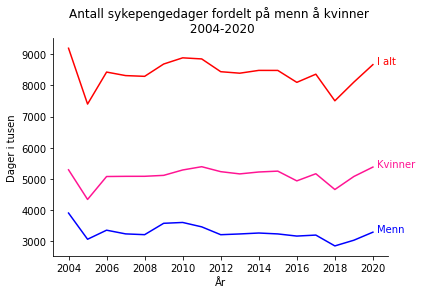

In [35]:
# plotter DF.

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Dager i tusen')
ax.set_xlabel('År')
ax.set_title("Antall sykepengedager fordelt på menn å kvinner \n 2004-2020")


# Plotting the different lines
 
x = g["År"]
y = g["I Alt"]
label = "I alt"
color = "red"

ax.plot(x, y, color = color)

ax.annotate(label,
    xy      = (         x[17],y[17]),
    xytext  = (1.0001 * x[17],y[17]),
    color = color
    )

x = g["År"]
y = g["Menn"]
label = "Menn"
color = "b"

ax.plot(x, y, color = color)

ax.annotate(label,
    xy      = (         x[17],y[17]),
    xytext  = (1.0001 * x[17],y[17]),
    color = color
    )

x = g["År"]
y = g["Kvinner"]
label = "Kvinner"
color = "deeppink"

ax.plot(x, y, color = color)

ax.annotate(label,
    xy      = (         x[17],y[17]),
    xytext  = (1.0001 * x[17],y[17]),
    color = color
    )

# removing spines from top and right side
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [29]:
# oppretter egne dataframes til regresjonsanalyse.
y=g['I Alt']
pd.DataFrame(y)

,I Alt
1,9194
2,7402
3,8429
4,8316
5,8292
6,8687
7,8886
8,8851
9,8441
10,8393


In [30]:
# oppretter egne dataframes til regresjonsanalyse.
e=pd.DataFrame(np.log(g['Menn']))
e

,Menn
1,8.269501
2,8.026824
3,8.117611
4,8.081475
5,8.073715
6,8.181441
7,8.188967
8,8.149024
9,8.073403
10,8.080856


In [31]:
# oppretter egne dataframes til regresjonsanalyse.
z=pd.DataFrame(np.log(g['Kvinner']))
z

,Kvinner
1,8.573763
2,8.375630
3,8.532279
4,8.533460
5,8.533657
6,8.539542
7,8.572817
8,8.592486
9,8.562549
10,8.548692


In [32]:
# oppretter egne dataframes til regresjonsanalyse.
x = e
x["Kvinner"] = z
x['intercept']=1
x

,Menn,Kvinner,intercept
1,8.269501,8.573763,1
2,8.026824,8.375630,1
3,8.117611,8.532279,1
4,8.081475,8.533460,1
5,8.073715,8.533657,1
6,8.181441,8.539542,1
7,8.188967,8.572817,1
8,8.149024,8.592486,1
9,8.073403,8.562549,1
10,8.080856,8.548692,1


In [33]:
# utfører regresjonsanalyse. 
res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  I Alt   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7567.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           5.76e-22
Time:                        11:52:39   Log-Likelihood:                -68.047
No. Observations:                  17   AIC:                             142.1
Df Residuals:                      14   BIC:                             144.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Menn        3456.7788     62.378     55.417      0.0

C:\Users\Kenne\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Vi har benyttet koden til Espen Sirnes for å webscrape statistikk fra NAV som viser oss sykepengedager som er utbetalt i tusen dager fra perioden 2004 til 2020. 

Deretter slicer vi dataen slik at vi kun får med oss det som er interessant for å danne regresjonsanalyse på. 

vi benytter transpose for å fjerne årstall i kolonnene, reset indeksen slik at vi kan få fjernet uønsket tekst. 

Fyller vi inn ny kolonne med årstall og dermed dropper første rad i tabellen ettersom den kun inneholder tekst. 

undersøker hvordan strukturen i dataframen ser ut. Den kommer ut som objekter med mellomrom i tallene, noe som matplotlib ikke plotter. Omgjør dermed hele dataframen til integer uten noen mellomrom som er plottbar. 

Oppretter et plot på antall sykepengedager fordelt på menn og kvinner. 

Oppretter nye dataframes som skal benyttes i regresjonsanalyse. 

Ut i fra hva python har kalkulert, ser vi intercept som er tilnærmet null forteller oss dersom ingen menn eller kvinner har sykefravær vil det være tilnærmet null sykedager. 